In [2]:
from moonlight import *
import numpy as np
import matplotlib.pyplot as plt

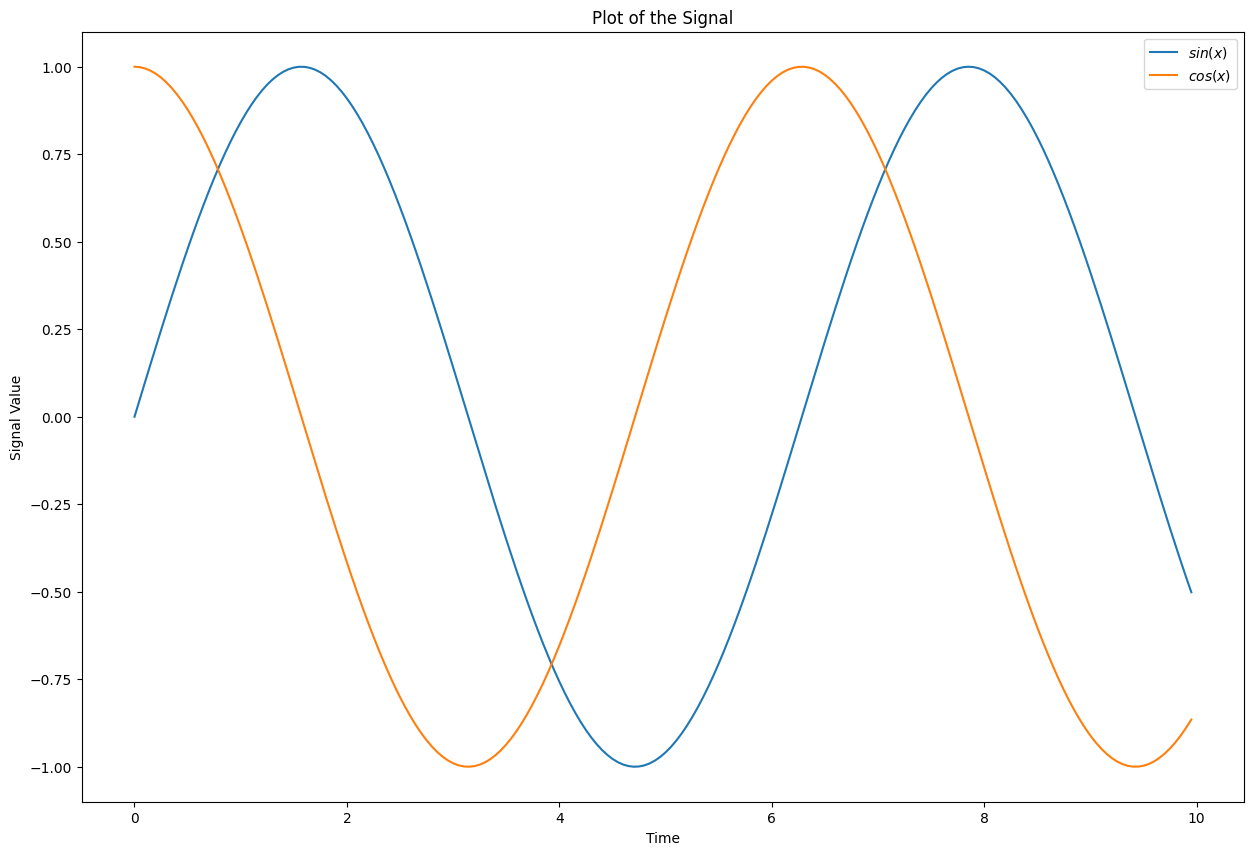

In [9]:
## STEP 1: generate the  signal
time =list(np.arange(0,10,0.05))
f1,f2 = np.sin(time),np.cos(time)

plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, label = '$sin(x)$')
plt.plot(time,f2, label = '$cos(x)$')
plt.title("Plot of the Signal")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()

In [10]:
## STEP 2: describe and load the monitor

script = """
signal { real x; real y;}
domain boolean; 
formula future = globally [0, 0.2]  (x > y);
formula past = historically [0, 0.2]  (x > y);
"""

moonlightScript = ScriptLoader.loadFromText(script)

In [25]:
## STEP 3 (optional): change the domain on the fly
#moonlightScript.setMinMaxDomain();
#moonlightScript.setBooleanDomain();

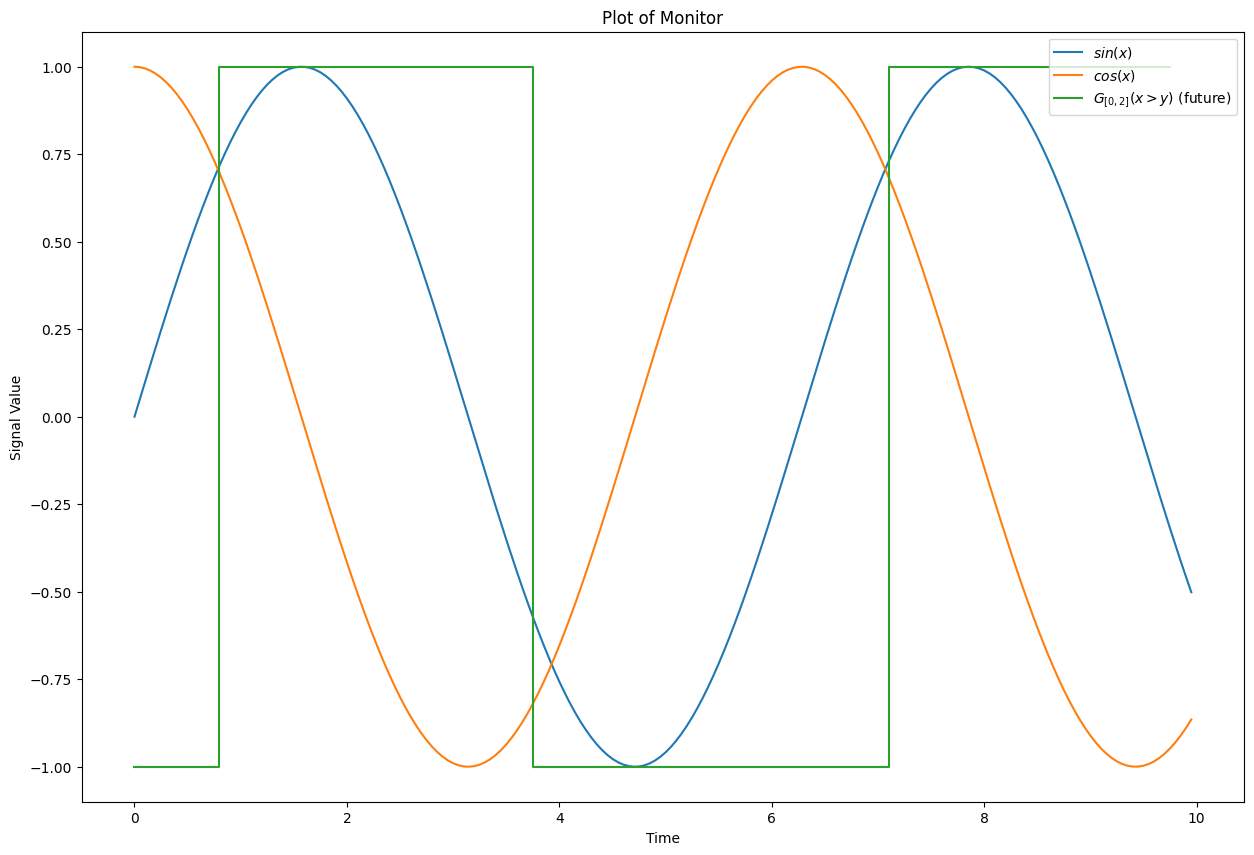

In [ ]:
## STEP 4: getting the monitor associated with a target formula
futureMonitor = moonlightScript.getMonitor("future")

## STEP 5: monitor the signal 
signals = list(zip(f1,f2))
result = np.array(futureMonitor.monitor(time,signals))

plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, label = '$sin(x)$')
plt.plot(time,f2, label = '$cos(x)$')
plt.step(result[:,0],result[:,1], where='post', label="$G_{[0,2]}(x>y)$ (future)")
plt.title("Plot of Monitor")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()


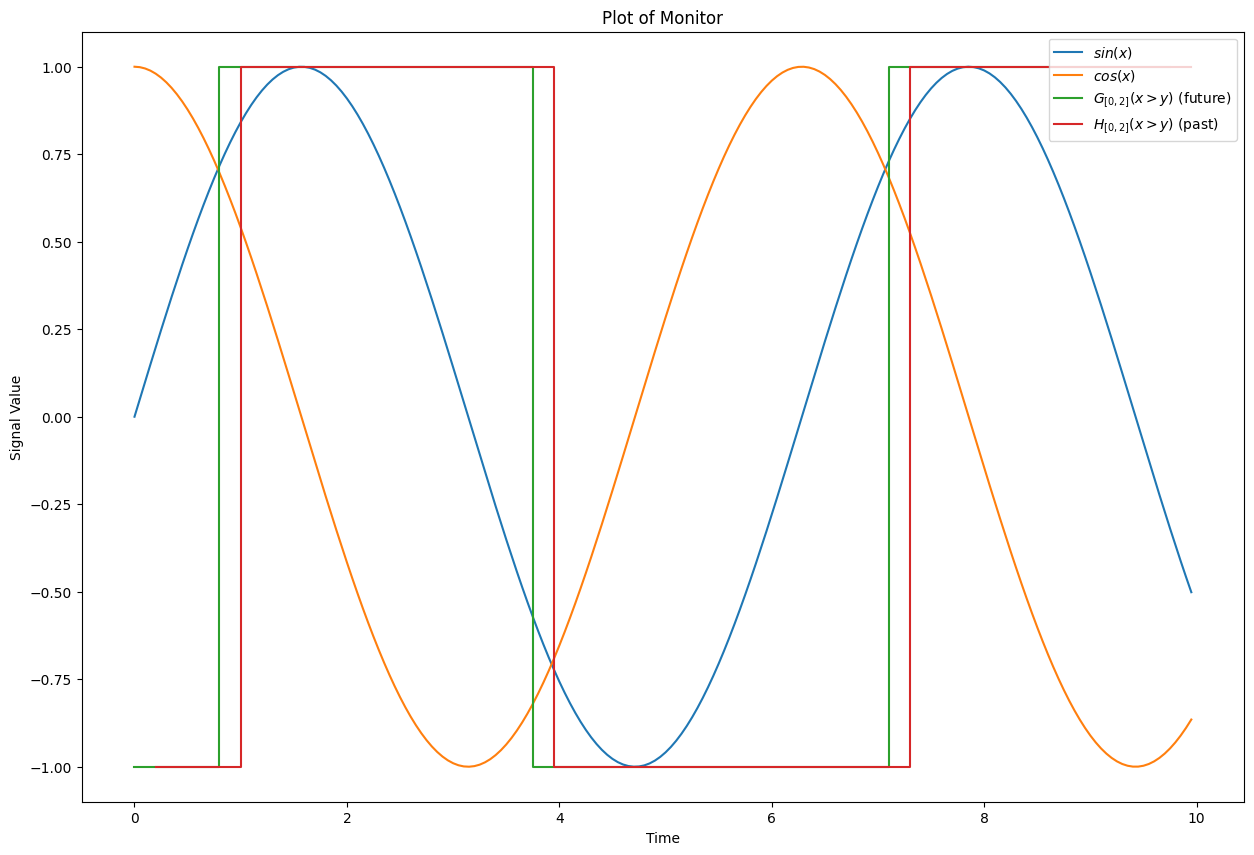

In [22]:
futureMonitor = moonlightScript.getMonitor("future")
pastMonitor = moonlightScript.getMonitor("past")
signals = list(zip(f1,f2))
result_future = np.array(futureMonitor.monitor(time,signals))
result_past = np.array(pastMonitor.monitor(time,signals))


plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, label = '$sin(x)$')
plt.plot(time,f2, label = '$cos(x)$')
plt.step(result_future[:,0],result_future[:,1], where='post', label="$G_{[0,2]}(x>y)$ (future)")
plt.step(result_past[:,0],result_past[:,1], where='post', label="$H_{[0,2]}(x>y)$ (past)")
plt.title("Plot of Monitor")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()


In [26]:
script = """
signal { real x; }
domain boolean; 
formula future = globally [0, 0.2]  (x > 1);
"""
moonlightScript = ScriptLoader.loadFromText(script)

In [27]:
monitor = moonlightScript.getMonitor("future")
time =list(np.arange(0,10,0.05))
f1=np.sin(time)
space = [[x] for x in f1]
result =monitor.monitor(time,space)

In [28]:
print(result)

[[0.0, -1.0], [9.750000000000002, -1.0]]


### Spatio-temporal Example

#### loadFromText

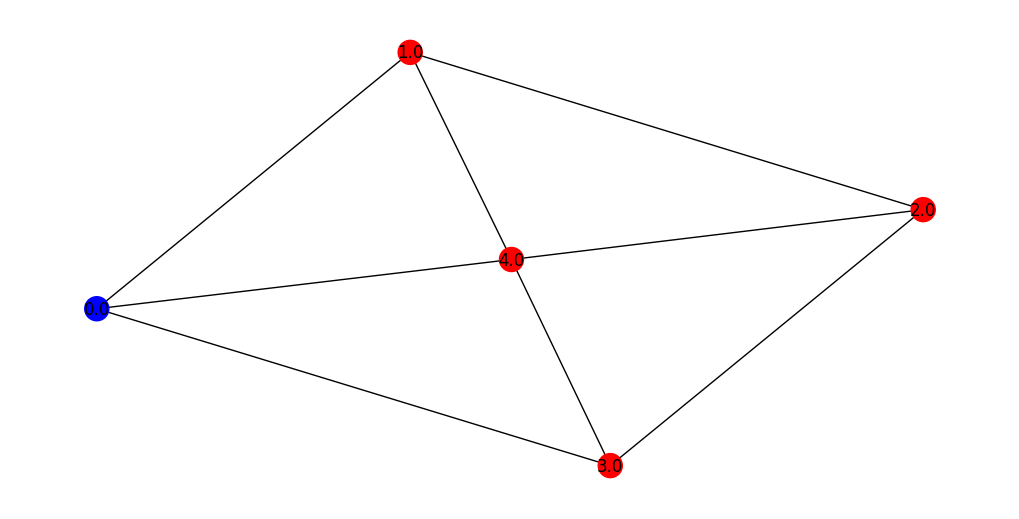

In [62]:
import networkx as nx 

script = """
signal { int nodeType; }
space {edges { int hop; }}
domain boolean;
formula MyFirstFormula = globally{( nodeType==3 ) reach(hop) [0, 1] ( nodeType==1 )};
"""

moonlightScript = ScriptLoader.loadFromText(script)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph = [[[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]]
locationTimeArray = [0.0]
signal = [[[1.0]], [[3.0]], [[3.0]], [[3.0]], [[3.0]]]


plt.rcParams["figure.figsize"] = (10,5)
color = {1.0:"blue",3.0:"red"}
G = nx.Graph()
G.add_edges_from([(x[0],x[1]) for x in  graph[0]])
color_map = [color[value[0][0]] for value in signal]
nx.draw(G, node_color = color_map, with_labels = True)

In [63]:
result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)

times = new double[]{0.0}
graph = new double[][][]{{{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 4.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 2.0, 1.0}, {4.0, 3.0, 1.0}}}
signalTimeArray = new double[]{0.0}
signalValues = new double[][][]{{{1.0}}, {{3.0}}, {{3.0}}, {{3.0}}, {{3.0}}}
[[[0.0, 1.0]], [[0.0, 1.0]], [[0.0, -1.0]], [[0.0, 1.0]], [[0.0, 1.0]]]


#### Make graph evolving

In [79]:
script = """
signal { int nodeType; }
space {edges { int hop; }}
domain boolean;
formula MyFirstFormula = globally{( nodeType==3 ) reach(hop) [0, 1] ( nodeType==1 )};
"""

moonlightScript = ScriptLoader.loadFromText(script)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph0 = [[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]
graph1 = [[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 3.0, 1.0]]
graph = [graph0,graph1]
locationTimeArray = [0.0, 1.0]
signal = [[[1.0],[1.0]], [[3.0],[3.0]], [[3.0],[3.0]], [[3.0],[3.0]], [[3.0],[3.0]]]

result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)


times = new double[]{0.0, 1.0}
graph = new double[][][]{{{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 4.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 2.0, 1.0}, {4.0, 3.0, 1.0}}, {{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 3.0, 1.0}}}
signalTimeArray = new double[]{0.0, 1.0}
signalValues = new double[][][]{{{1.0}, {1.0}}, {{3.0}, {3.0}}, {{3.0}, {3.0}}, {{3.0}, {3.0}}, {{3.0}, {3.0}}}
[[[0.0, 1.0], [1.0, 1.0]], [[0.0, 1.0], [1.0, 1.0]], [[0.0, -1.0], [1.0, -1.0]], [[0.0, 1.0], [1.0, 1.0]], [[0.0, 1.0], [1.0, 1.0]]]


In [74]:
graph

[[[0.0, 1.0, 1.0],
  [0.0, 3.0, 1.0],
  [0.0, 4.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 4.0, 1.0],
  [1.0, 2.0, 1.0],
  [2.0, 1.0, 1.0],
  [2.0, 4.0, 1.0],
  [2.0, 3.0, 1.0],
  [3.0, 0.0, 1.0],
  [3.0, 2.0, 1.0],
  [3.0, 4.0, 1.0],
  [4.0, 0.0, 1.0],
  [4.0, 1.0, 1.0],
  [4.0, 2.0, 1.0],
  [4.0, 3.0, 1.0]],
 [[0.0, 1.0, 1.0],
  [0.0, 3.0, 1.0],
  [0.0, 4.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 4.0, 1.0],
  [1.0, 2.0, 1.0],
  [2.0, 1.0, 1.0],
  [2.0, 4.0, 1.0],
  [2.0, 3.0, 1.0],
  [3.0, 0.0, 1.0],
  [3.0, 2.0, 1.0],
  [3.0, 4.0, 1.0],
  [4.0, 0.0, 1.0],
  [4.0, 1.0, 1.0],
  [4.0, 3.0, 1.0]]]

#### loadFormFile

In [64]:
scriptPath = "script.mls"
moonlightScript = ScriptLoader.loadFromFile(scriptPath)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph = [[[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]]
locationTimeArray = [0.0]
signal = [[[1.0]], [[3.0]], [[3.0]], [[3.0]], [[3.0]]]

result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)

times = new double[]{0.0}
graph = new double[][][]{{{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 4.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 2.0, 1.0}, {4.0, 3.0, 1.0}}}
signalTimeArray = new double[]{0.0}
signalValues = new double[][][]{{{1.0}}, {{3.0}}, {{3.0}}, {{3.0}}, {{3.0}}}
[[[0.0, 1.0]], [[0.0, 1.0]], [[0.0, -1.0]], [[0.0, 1.0]], [[0.0, 1.0]]]
